In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin, sinh, pi, sum, exp

**1.** Encontre a temperatura $u(x, t)$ numa barra de cobre de 80 cm de comprimento e isolada lateralmente, considerando que a temperatura inicial seja de $100 \operatorname{sen}(\pi x / 80)^{\circ} \mathrm{C}$ e que extremidades estejam mantidas a $0^{\circ} \mathrm{C}$. Quanto tempo será necessário para que a temperatura máxima caia a $50^{\circ} \mathrm{C}$?
Dados físicos sobre o cobre: massa específica $8,92 \mathrm{gm} / \mathrm{cm}^3$, calor específico 0,092 $\mathrm{cal} /\left(\mathrm{gm}^{\circ} \mathrm{C}\right)$, condutividade térmica $0,95 \mathrm{cal} /\left(\mathrm{cm} \mathrm{s}{ }^{\circ} \mathrm{C}\right)$.

**_Solução:_** A condição inicial fornece

$$
u(x, 0)=\sum_{n=1}^{\infty} B_n \operatorname{sen} \frac{n \pi x}{80}=f(x)=100 \operatorname{sen} \frac{\pi x}{80}
$$


Logo, obtemos $B_1=100, B_2=B_3=\cdots=0$. Precisamos de $\lambda_1{ }^2=c^2 \pi^2 / L^2$, onde $c^2=K /(\sigma \rho)=0,95 /(0,092 \times 8,92)=1,158\left[\mathrm{~cm}^2 / \mathrm{s}\right]$. Portanto, obtemos

$$
\lambda_1^2=1,158 \cdot 9,870 / 80^2=0,001785\left[\mathrm{~s}^{-1}\right]
$$


A solução é

$$
u(x, t)=100 \operatorname{sen} \frac{\pi x}{80} e^{-0,001785 t}
$$


Além disso, $100 e^{-0,001785 t}=50$ quando $t=(\ln 0,5) /(-0,001785)=388[\mathrm{~s}] \approx 6,5[\mathrm{~min}]$. 

Vamos fazer o gráfico usando Python.

In [2]:
L = 80; nx = 80
x_mesh, y_mesh = np.meshgrid(np.linspace(0,L,nx+1),np.linspace(0,1,2))
xi = np.linspace(0,L,nx+1)
u = lambda x,t: 100*sin(pi*x/80)*exp(-0.001785*t)

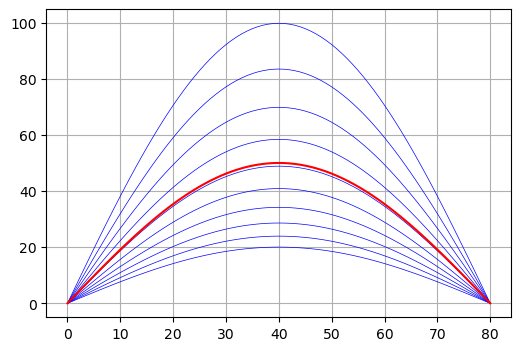

In [3]:
fig, ax = plt.subplots(figsize=(6, 4))
for t in range(1,1000,100):
    plt.plot(xi,u(xi,t), color='b', lw=0.5)
plt.plot(xi,u(xi,388), color='r')
plt.grid()
plt.show()

**2.** A temperatura numa barra de comprimento $L$, lateralmente isolada e cujas extremidades são mantidas numa temperatura 0 , supondo que a temperatura inicial seja

$$
f(x)=\left\{\begin{array}{ccc}
x & \text { se } & 0<x<L / 2, \\
L-x & \text { se } & L / 2<x<L .
\end{array}\right.
$$

é dada pela função (solução analítica)

$$
u(x, t)=\frac{4 L}{\pi^2}\left[\operatorname{sen} \frac{\pi x}{L} \exp \left[-\left(\frac{c \pi}{L}\right)^2 t\right]-\frac{1}{9} \operatorname{sen} \frac{3 \pi x}{L} \exp \left[-\left(\frac{3 c \pi}{L}\right)^2 t\right]+-\cdots\right] .
$$

Vamos plotar a solução para alguns valores de $t$ considerando os dados do exercício anterior.

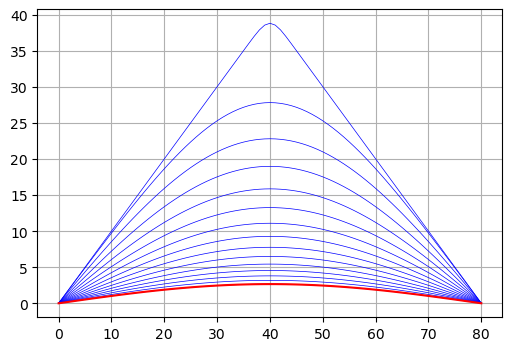

In [4]:
L = 80; nx = 80
xi = np.linspace(0,L,nx+1)
c = np.sqrt(1.158)
def u(xi,t,nmax): #xi é um vetor
    soma = 0
    sinal = 1
    for n in range(1,nmax+1,2):
        soma += (4*L/pi**2)*(sinal/n**2)*sin(n*pi*xi/L)*exp(-(n*c*pi/L)**2*t)
        sinal = sinal*(-1)
    return soma

fig, ax = plt.subplots(figsize=(6, 4))
for t in range(1,1500,100):
    plt.plot(xi,u(xi,t,100), color='b', lw=0.5)
plt.plot(xi,u(xi,t,100), color='r')
plt.grid()
plt.show()

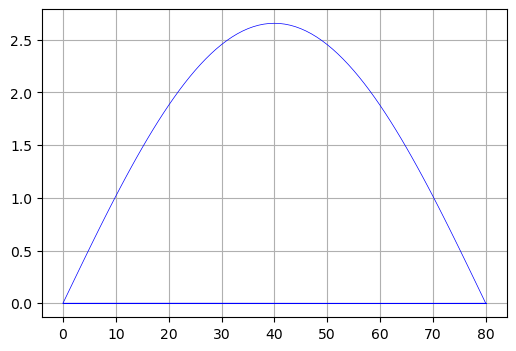

In [5]:
fig, ax = plt.subplots(figsize=(6, 4))
for n in range(1,20):
    sinal = 1
    u = (4*L/pi**2)*(sinal/n**2)*sin(n*pi*xi/L)*exp(-(n*c*pi/L)**2*t)
    sinal = sinal*(-1)
    plt.plot(xi,u, color='b', lw=0.5)
#plt.plot(xi,xi,u(xi,2,nmax), color='r')
plt.grid()
plt.show()

#### Tentativa de animação não muito bem sucedida

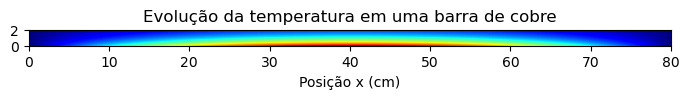

In [6]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Solução analítica
u = lambda x, t: 100 * np.sin(np.pi * x / 80) * np.exp(-0.001785 * t)

# Domínio
x = np.linspace(0, 80, 200)
t_values = np.linspace(0, 1000, 200)
X, T = np.meshgrid(x, t_values)
U = u(X, T)

# Figura
fig, ax = plt.subplots(figsize=(7, 4))
ax.set_xlabel("Posição x (cm)")
ax.set_title("Evolução da temperatura em uma barra de cobre")

heatmap = ax.imshow(U[0:2, :],
                    extent=[0, 80, 0, 2],
                    #aspect='auto',
                    origin='lower',
                    cmap='jet',
                    vmin=0, vmax=100)

#cbar = plt.colorbar(heatmap, ax=ax, label="Temperatura (°C)")

def update(frame):
    heatmap.set_data(U[:frame, :])
    return [heatmap]

ani = FuncAnimation(fig, update, frames=len(t_values),
                    interval=60, blit=True)

plt.tight_layout()

## Mostra a animação dentro do Jupyter
HTML(ani.to_jshtml())


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
x = np.arange(0, 10)
y = np.array([0,0.5,0.7,0.8,0.7,0.6,0.5,0.3,0.1,0.01])
f = interpolate.interp1d(x, y, kind='cubic')

In [23]:
xnew = np.linspace(0,9,100)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

In [24]:
xnew

array([0.        , 0.09090909, 0.18181818, 0.27272727, 0.36363636,
       0.45454545, 0.54545455, 0.63636364, 0.72727273, 0.81818182,
       0.90909091, 1.        , 1.09090909, 1.18181818, 1.27272727,
       1.36363636, 1.45454545, 1.54545455, 1.63636364, 1.72727273,
       1.81818182, 1.90909091, 2.        , 2.09090909, 2.18181818,
       2.27272727, 2.36363636, 2.45454545, 2.54545455, 2.63636364,
       2.72727273, 2.81818182, 2.90909091, 3.        , 3.09090909,
       3.18181818, 3.27272727, 3.36363636, 3.45454545, 3.54545455,
       3.63636364, 3.72727273, 3.81818182, 3.90909091, 4.        ,
       4.09090909, 4.18181818, 4.27272727, 4.36363636, 4.45454545,
       4.54545455, 4.63636364, 4.72727273, 4.81818182, 4.90909091,
       5.        , 5.09090909, 5.18181818, 5.27272727, 5.36363636,
       5.45454545, 5.54545455, 5.63636364, 5.72727273, 5.81818182,
       5.90909091, 6.        , 6.09090909, 6.18181818, 6.27272727,
       6.36363636, 6.45454545, 6.54545455, 6.63636364, 6.72727

In [25]:
plt.plot(xnew, ynew, '-')
plt.show()